In [36]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('covid.csv')
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [25]:
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data["pc"].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)

In [26]:
X = np.array(list(zip(pc, wbc, mc, ast, bc, ldh)))

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
model = MultinomialNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

In [31]:
print("Accuracy:",accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



In [35]:
lr_probs = model.predict_proba(Xtest)
lr_probs = lr_probs[:,1]
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

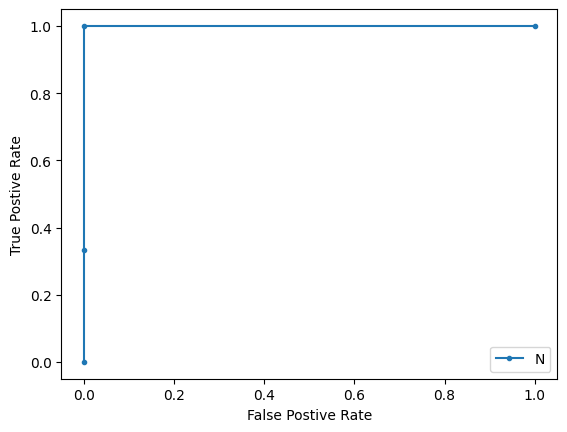

In [39]:
plt.plot(lr_fpr, lr_tpr, marker = ".")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend("Naive Bayes Classifier")
plt.show()